##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

### Set up workspace

In [1]:
import sys
sys.path.append('../')

In [2]:
######################## Load modules ###################################
%matplotlib inline
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.process_data import calculate_tcr_time_series
from plants_and_TCR.generate_figures import plot_scatter_CMIP

####################### Set up directory structure ######################
PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES

# Calculate TCRs

In [37]:
#Calculate from scratch
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['RAD','TOT','PHYS','TOT-RAD'],
                                                         average_types=['global','land'],
                                                         save_tcr_dict=True,
                                                         recalculate_TCRs=True)

bcc-csm1-1
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
CanESM2
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> del

In [3]:
# Load precalculated
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle', "rb"))

In [4]:
end_yr = 70
cmip_cutoff = 8

In [5]:
globalTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='global',
                                              tcr_types=['RAD','TOT'])
globalTCR_CMIP5 = globalTCR[0:cmip_cutoff]
globalTCR_CMIP6 = globalTCR[cmip_cutoff:len(globalTCR)]

In [6]:
landTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='land',
                                              tcr_types=['RAD','TOT'])
landTCR_CMIP5 = landTCR[0:cmip_cutoff]
landTCR_CMIP6 = landTCR[cmip_cutoff:len(landTCR)]

### Figure 4

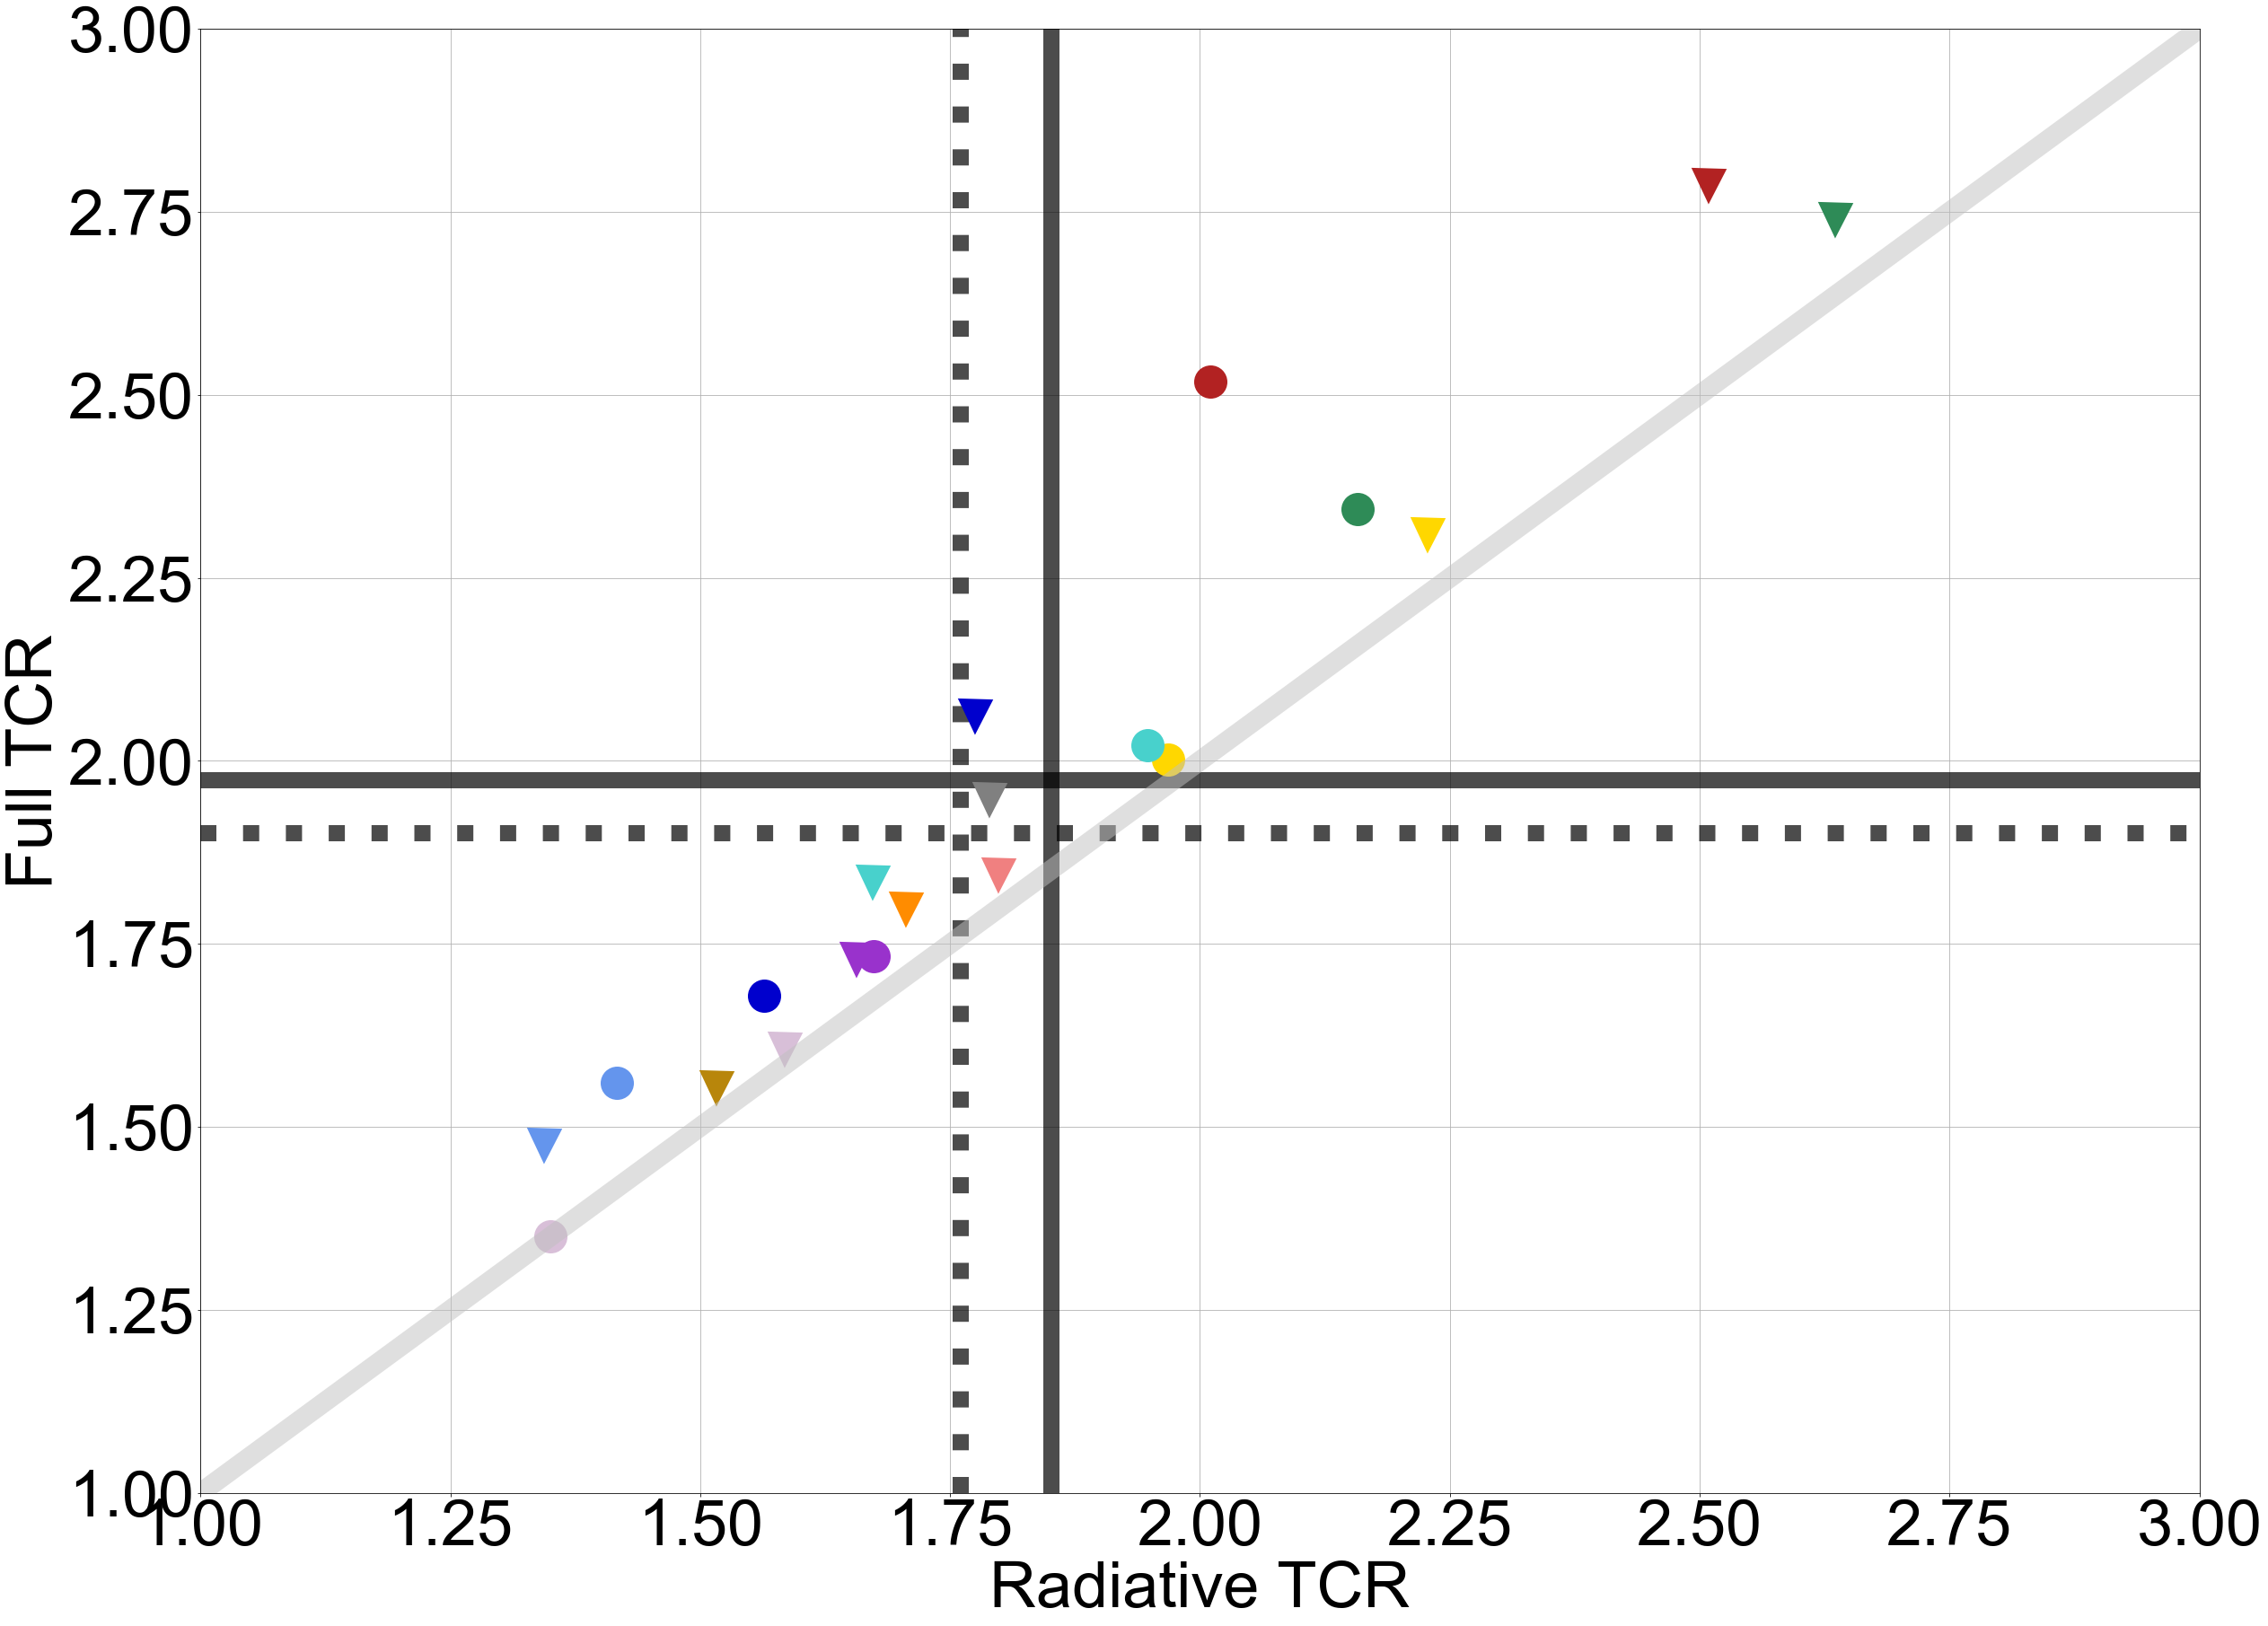

In [9]:
xvals = globalTCR['RAD'].values
yvals = globalTCR['TOT'].values

XLIMS = [1,3]; #[1.5,6.5];
YLIMS = [1,3]; #[1.5,6.5];
XLABEL = 'Radiative TCR';
YLABEL = 'Full TCR';
plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    one_to_one_line=True,
                                    xlims=XLIMS, ylims=YLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    legend_on=False, filled=True, dt=0.25,
                                   filepath=PATH_FIGURES+'Fig4_RADvsFULL_TCR')

# Get data for table

In [8]:
globalTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='global',
                                              tcr_types=['TOT','RAD','PHYS','TOT-RAD'])

In [9]:
globalTCR['RAD_pct'] = globalTCR['RAD']*100/globalTCR['TOT']
globalTCR['PHYS_pct'] = globalTCR['PHYS']*100/globalTCR['TOT']
globalTCR['TOT-RAD_pct'] = globalTCR['TOT-RAD']*100/globalTCR['TOT']

In [10]:
globalTCR.round(2)

,TOT,RAD,PHYS,TOT-RAD,RAD_pct,PHYS_pct,TOT-RAD_pct
bcc-csm1-1,1.73,1.67,0.05,0.06,96.52,2.81,3.48
CanESM2,2.34,2.16,0.15,0.19,92.05,6.48,7.95
CESM1-BGC,1.68,1.56,0.11,0.11,93.15,6.65,6.84
GFDL-ESM2M,1.35,1.35,0.05,0.00,99.92,3.39,0.08
HadGEM2-ES,2.52,2.01,0.37,0.51,79.86,14.57,20.14
IPSL-CM5A-LR,2.00,1.97,0.11,0.03,98.34,5.59,1.66
NorESM1-ME,1.56,1.42,0.08,0.14,90.79,5.28,9.21
MPI-ESM-LR,2.02,1.95,0.20,0.07,96.38,9.87,3.62
CNRM-ESM2-1,1.84,1.80,-0.15,0.05,97.49,-7.95,2.51
BCC-CSM2-MR,1.73,1.66,0.54,0.07,95.80,31.43,4.20
